# Face detection with OpenCV and deep learning
https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 20

In [2]:
# Parameters
image_path = "images/iron_chic.jpg" # Path to input image
prototxt = "model/deploy.prototxt.txt" # Path to Caffe 'deploy' prototxt file
model = "model/res10_300x300_ssd_iter_140000.caffemodel" # Path to Caffe pre-trained model
confidence = 0.5 # Minimum probability to filter weak detections

In [3]:
# Load serialized model from disk
net = cv2.dnn.readNetFromCaffe(prototxt, model)

# Load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
image = cv2.imread(image_path)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), scalefactor=1.0, size=(300, 300),
                             mean=(104.0, 117.0, 123.0), swapRB=True)

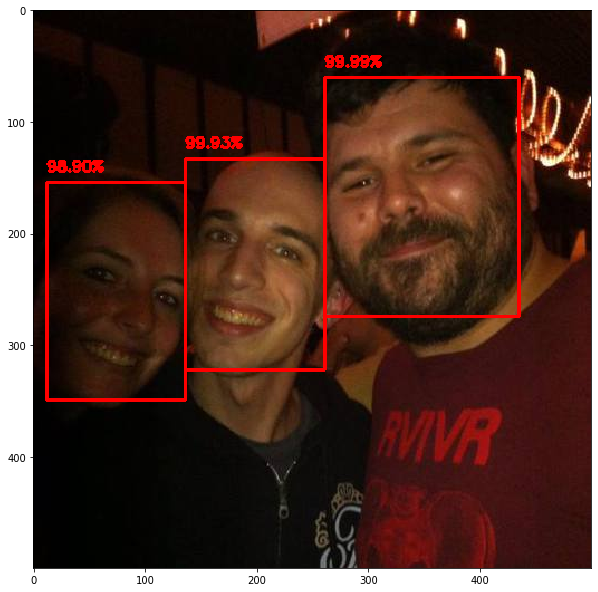

In [4]:
# Pass the blob through the network and obtain the detections and predictions
net.setInput(blob)
detections = net.forward()

# Loop over the detections
for i in range(detections.shape[2]):
    # Extract the confidence (i.e., probability) associated with the prediction
    conf = detections[0, 0, i, 2]
    # Filter out weak detections by ensuring the `confidence` is greater than the minimum confidence
    if conf > confidence:
        # Compute the (x, y)-coordinates of the bounding box for the object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
 
        # Draw the bounding box of the face along with the associated probability
        text = "{:.2f}%".format(conf * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

# Show the output image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)